###  Failure Mode 1 — Sample Complexity with Increasing Confounders

This experiment further analyzes Failure Mode 1 by increasing the number of confounding covariates while keeping the number of effect modifiers fixed. Confounders directly influence both treatment assignment and potential outcomes, making them especially prone to inducing bias if not properly accounted for.

The heatmap below reproduces Figure 4 in Section 4.1.1 of the paper. It shows that CMGP struggles to produce reliable estimates when the confounding dimensionality increases, unless the dataset size grows accordingly. This confirms the instability of ARD in high-dimensional settings and motivates the variance-regularized enhancements proposed later in the paper.


In [5]:
from src.evaluate import evaluate_dataset

def plot_pehe_heatmap_confounders(
    d_list=[5, 10, 15, 20, 25, 30, 35],
    sample_sizes=range(50, 1500, 150),
    seeds=range(5),
    polynomial_degree=2,
    max_iterations=100
):
    """
    Computes and visualizes a heatmap of √PEHE values across varying dimensionality (d)
    and sample sizes to evaluate CMGP's robustness when increasing the number of confounders.

    This experiment corresponds to Figure 4 in Section 4.1.1 of the paper and illustrates how
    increasing the number of confounding variables (while fixing the number of effect modifiers)
    leads to higher sample requirements and potential overfitting.

    Args:
        d_list (list[int]): Total covariate dimensions to test (d = confounders + modifiers).
        sample_sizes (iterable[int]): Sample sizes for synthetic datasets.
        seeds (list[int]): Random seeds for averaging.
        polynomial_degree (int): Degree of the outcome model polynomial.
        max_iterations (int): Max GP training steps.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pathlib import Path

    heatmap_data = []

    for d in d_list:
        n_c = d - 2             # Vary number of confounders
        n_m = 2                 # Fix number of effect modifiers
        row = []
        for n in sample_sizes:
            pehes = []
            for seed in seeds:
                result = evaluate_dataset(
                    "synthetic",
                    data_path=Path("src/data"),
                    n_confounders=n_c,
                    n_effect_modifiers=n_m,
                    n_instruments=0,
                    n_samples=n,
                    seed=seed,
                    polynomial_degree=polynomial_degree,
                    max_gp_iterations=max_iterations,
                    variance_ard=False,
                    overlap_scaling=False
                )
                pehes.append(result["√PEHE"])
            row.append(np.mean(pehes))
        heatmap_data.append(row)

    # Plot the √PEHE heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        np.array(heatmap_data),
        xticklabels=list(sample_sizes),
        yticklabels=d_list,
        cmap="viridis",
        annot=True, fmt=".2f",
        cbar_kws={"label": "√PEHE"}
    )
    plt.xlabel("Sample Size")
    plt.ylabel("Covariate Dimension (d)")
    plt.title("√PEHE across Dimensionality and Sample Size (Fixed Effect Modifiers)")
    plt.tight_layout()
    plt.show()


 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in divide
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\rbf.py:178: RuntimeWarning:invalid value encountered in multiply
 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide
 C:\Users\logan\

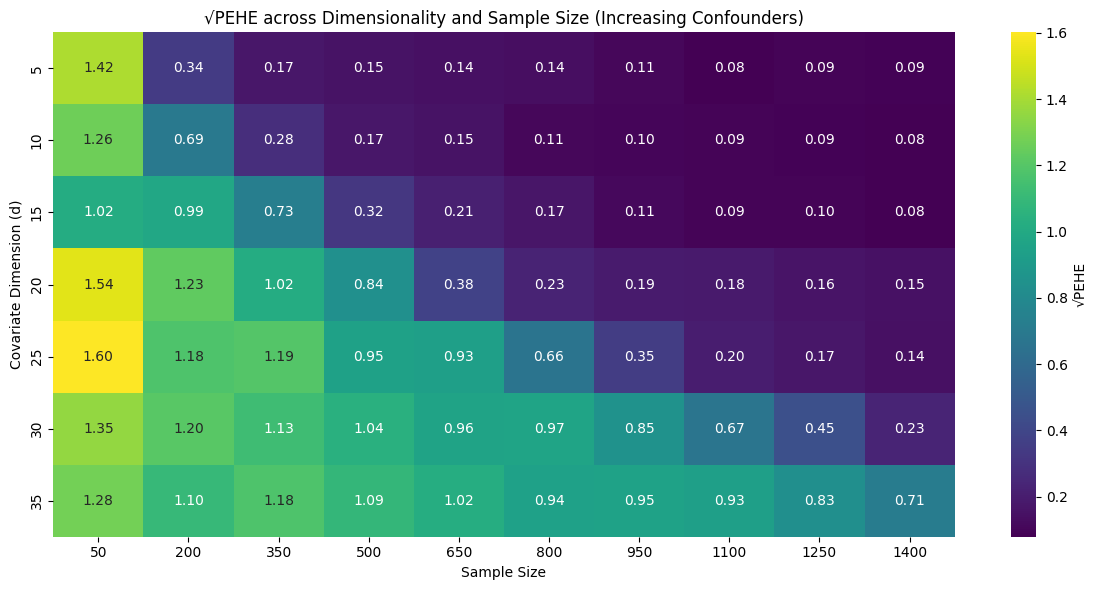

In [10]:
plot_pehe_heatmap_confounders()